Import Required Libraries

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# For inline plotting in notebooks:
%matplotlib inline

Generate and Plot the Graph

In this example, we create a simple strongly connected and aperiodic directed graph with three nodes and the following directed edges:
1 → 2, 1 → 3, 2 → 3, and 3 → 1.

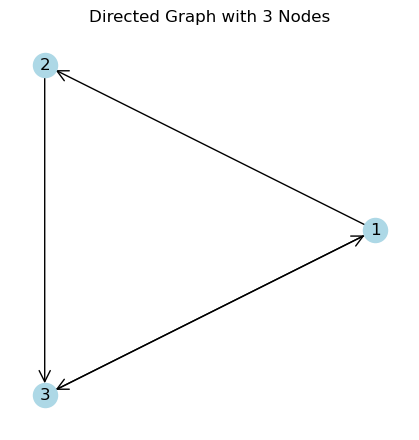

In [2]:
# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(2, 3)
G.add_edge(3, 1)

# Use a circular layout to position the nodes nicely
pos = nx.circular_layout(G)

plt.figure(figsize=(4, 4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', arrows=True, arrowstyle='->', arrowsize=20)
plt.title("Directed Graph with 3 Nodes")
plt.show()

Define the Random Walk Transition Matrix and Simulate Its Evolution

Here, we define the random walk transition matrix P based on the graph’s edges. For node i, the probability of transitioning to node j is given by the entry P[i,j].

For our graph:
	•	Node 1 has two outgoing edges (to nodes 2 and 3), so the probabilities are 0.5 each.
	•	Node 2 has one outgoing edge (to node 3), so the probability is 1.
	•	Node 3 has one outgoing edge (to node 1), so the probability is 1.

We then simulate the evolution starting from node 1 (initial probability vector z_0 = [1,0,0]).

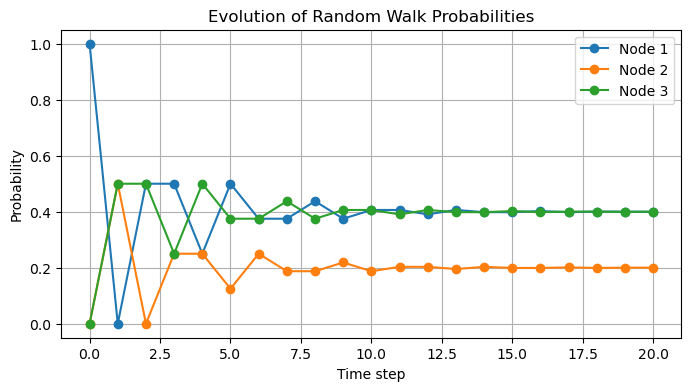

In [3]:
# Define the random transition matrix P (row-stochastic)
P = np.array([
    [0,   0.5, 0.5],  # From node 1
    [0,   0,   1  ],  # From node 2
    [1,   0,   0  ]   # From node 3
])

# Initial probability distribution (starting at node 1)
z0 = np.array([1, 0, 0])

num_steps = 20
probs = np.zeros((num_steps+1, 3))
probs[0, :] = z0
z = z0.copy()

for t in range(1, num_steps+1):
    z = z @ P  # Update: z(t+1) = z(t) * P
    probs[t, :] = z

# Plot the evolution of the probabilities over time
plt.figure(figsize=(8, 4))
for i in range(3):
    plt.plot(range(num_steps+1), probs[:, i], marker='o', label=f'Node {i+1}')
plt.xlabel("Time step")
plt.ylabel("Probability")
plt.title("Evolution of Random Walk Probabilities")
plt.legend()
plt.grid(True)
plt.show()

Plot the Eigenvalues of the Random Transition Matrix

Next, we compute the eigenvalues of P and plot them in the complex plane. We also draw a circle with radius 1 (the spectral radius of a stochastic matrix) to confirm that all other eigenvalues lie inside (or on) this circle.

Eigenvalues of P: [ 1. +0.j  -0.5+0.5j -0.5-0.5j]


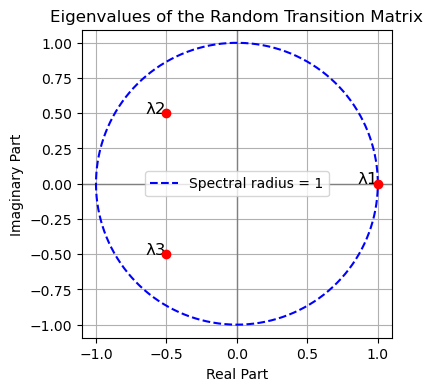

In [4]:
# Compute eigenvalues (and eigenvectors, though we don't use the latter here)
eigvals, eigvecs = np.linalg.eig(P)
print("Eigenvalues of P:", eigvals)

# Plot eigenvalues in the complex plane
plt.figure(figsize=(4, 4))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.scatter(eigvals.real, eigvals.imag, color='red', zorder=5)
for i, ev in enumerate(eigvals):
    plt.text(ev.real, ev.imag, f'λ{i+1}', fontsize=12, ha='right')

# Draw a circle with radius 1 (spectral radius)
theta = np.linspace(0, 2*np.pi, 300)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
plt.plot(circle_x, circle_y, 'b--', label='Spectral radius = 1')

plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.title("Eigenvalues of the Random Transition Matrix")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Below is an example code cell that creates an animated GIF of the evolution of the random walk probabilities using a bar chart. (Make sure you have installed the pillow package for saving GIFs, e.g. via pip install pillow.)

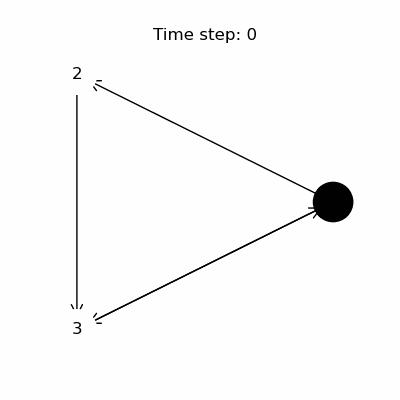

In [5]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import Image, display

# Create a new figure and axis for the animation
fig, ax = plt.subplots(figsize=(4, 4))

def update(frame):
    ax.clear()  # Clear the previous drawing
    # Get the probability for each node at the current time step.
    # Assuming nodes are ordered [1, 2, 3] corresponding to probs[:,0], probs[:,1], probs[:,2]
    node_probs = probs[frame, :]
    # Map probabilities to grayscale colors using the reversed 'gray' colormap
    # so that 1 -> black and 0 -> white.
    colors = [plt.cm.gray_r(prob) for prob in node_probs]

    # Draw nodes with the computed colors
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=800, ax=ax)
    # Draw edges with arrows
    nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=20, ax=ax)
    # Draw node labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=12)

    ax.set_title(f"Time step: {frame}")
    ax.set_axis_off()  # Hide axis ticks and labels
    return ax

# Create the animation with one frame per time step
ani = animation.FuncAnimation(fig, update, frames=range(num_steps+1), interval=500, repeat=True)

# Save the animation as a GIF (adjust fps and interval as needed)
gif_writer = PillowWriter(fps=2)
ani.save("random_walk_graph.gif", writer=gif_writer)

plt.close(fig)  # Close the figure to prevent duplicate output

# Display the generated GIF in the notebook
display(Image(filename="random_walk_graph.gif"))